In [1]:
# Install relevant modules
!pip install demoji
!pip install transformers
!pip install Levenshtein
!pip install datasets
!pip install tensorflow
!pip install keras
!pip install xgboost
# !pip install ...


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Loading Libraries
#For Data Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
from wordcloud import WordCloud
import re
import demoji
import pyarrow as pa

#For Word2Vec
from collections import defaultdict  # For word frequency
from time import time
import gensim # install this package 
import cython # install this package for multi-core processing
from Levenshtein import ratio as lev_ratio
import multiprocessing
from gensim.models import Word2Vec, FastText
from gensim.models.phrases import Phrases, Phraser
import gensim.downloader as api
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer

#For NLP
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#Transformers
from transformers import BertTokenizerFast
from transformers import AutoModelForSequenceClassification
from transformers import RobertaTokenizerFast
from transformers import RobertaForSequenceClassification
from transformers import EvalPrediction
from transformers import TrainingArguments, Trainer, TFTrainer
from torch.utils.data import DataLoader, Dataset

#For Resampling
from imblearn.over_sampling import RandomOverSampler

#For Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

#RNN
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
import keras
import scipy
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# LSTM
from datasets import Dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

#Metrics and Evaluation
from sklearn.metrics import balanced_accuracy_score, classification_report
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

[nltk_data] Downloading package omw-1.4 to C:\Users\Shan
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shan
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shan
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shan
[nltk_data]     Shan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Reading data
train_data = pd.read_csv("Corona_NLP_train.csv", encoding='latin-1',na_values=['NaN', ''],parse_dates=['TweetAt'], infer_datetime_format=True)
test_data = pd.read_csv("Corona_NLP_test.csv", encoding='latin-1',na_values=['NaN', ''],parse_dates=['TweetAt'], infer_datetime_format=True)

train_data.head()

C:\Users\Shan Shan\AppData\Local\Temp\ipykernel_23232\4222934597.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data = pd.read_csv("Corona_NLP_test.csv", encoding='latin-1',na_values=['NaN', ''],parse_dates=['TweetAt'], infer_datetime_format=True)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**Description of Variables**

Features

Names : Have been converted to codes for data privacy reasons

UserName : Unique identifier for person who published the tweet.

ScreenName : Name of user who published the tweet

Location : The location the tweet was published ( Contains NaN )

TweetAt : Date the tweet was published

OriginalTweet : The text contained within the tweet

Target

Sentiment : The general feelings of the person who published the tweet regarding Covid 19.

In [4]:
#Counting sum of NAs in Corona_NLP_train.csv
train_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
#Counting sum of NAs in Corona_NLP_test.csv
test_data.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [6]:
#Check number of duplicate rows
print(len(train_data.drop_duplicates()) == len(train_data))
print(len(test_data.drop_duplicates()) == len(test_data))

True
True


In [7]:
train_data.dtypes

UserName                  int64
ScreenName                int64
Location                 object
TweetAt          datetime64[ns]
OriginalTweet            object
Sentiment                object
dtype: object

In [8]:
# Impute location for missing datapoints
## We will use the most frequent location to impute the missing location.
most_freq_loc = train_data["Location"].mode()[0]
most_freq_loc_test = test_data["Location"].mode()[0]

train_data["Location"].fillna(value = most_freq_loc, inplace=True)
test_data["Location"].fillna(value = most_freq_loc_test, inplace=True)

[Text(0, 0, '11422 (28%)'),
 Text(0, 0, '9917 (24%)'),
 Text(0, 0, '7713 (19%)'),
 Text(0, 0, '6624 (16%)'),
 Text(0, 0, '5481 (13%)')]

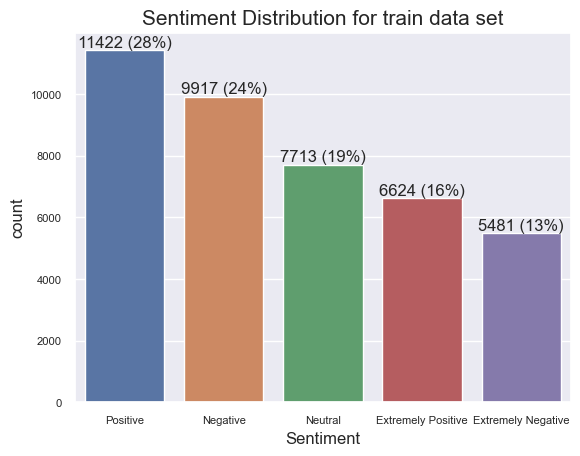

In [9]:
#View distribution of each sentiment for train set

sns.set(style="darkgrid")
sent_train_plot = sns.countplot(x="Sentiment", data=train_data, order=train_data['Sentiment'].value_counts(ascending=False).index)
abs_values = train_data['Sentiment'].value_counts(ascending=False)
rel_values = train_data['Sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
sent_train_plot.tick_params(labelsize= 8)
sent_train_plot.axes.set_title("Sentiment Distribution for train data set",fontsize=15)


sent_train_plot.bar_label(container=sent_train_plot.containers[0], labels=lbls)

[Text(0, 0, '1041 (27%)'),
 Text(0, 0, '947 (25%)'),
 Text(0, 0, '619 (16%)'),
 Text(0, 0, '599 (16%)'),
 Text(0, 0, '592 (16%)')]

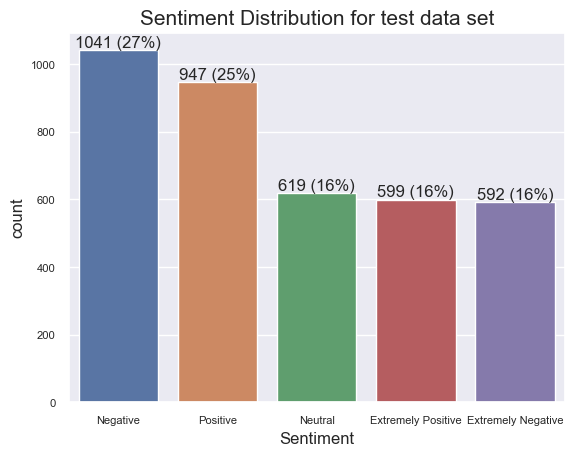

In [10]:
#View distribution of each sentiment for test set

sns.set(style="darkgrid")
sent_test_plot = sns.countplot(x="Sentiment", data=test_data, order=test_data['Sentiment'].value_counts(ascending=False).index)
abs_values2 = test_data['Sentiment'].value_counts(ascending=False)
rel_values2= test_data['Sentiment'].value_counts(ascending=False, normalize=True).values * 100
lbls2 = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values2, rel_values2)]
sent_test_plot.tick_params(labelsize= 8)
sent_test_plot.axes.set_title("Sentiment Distribution for test data set",fontsize=15)


sent_test_plot.bar_label(container=sent_test_plot.containers[0], labels=lbls2)

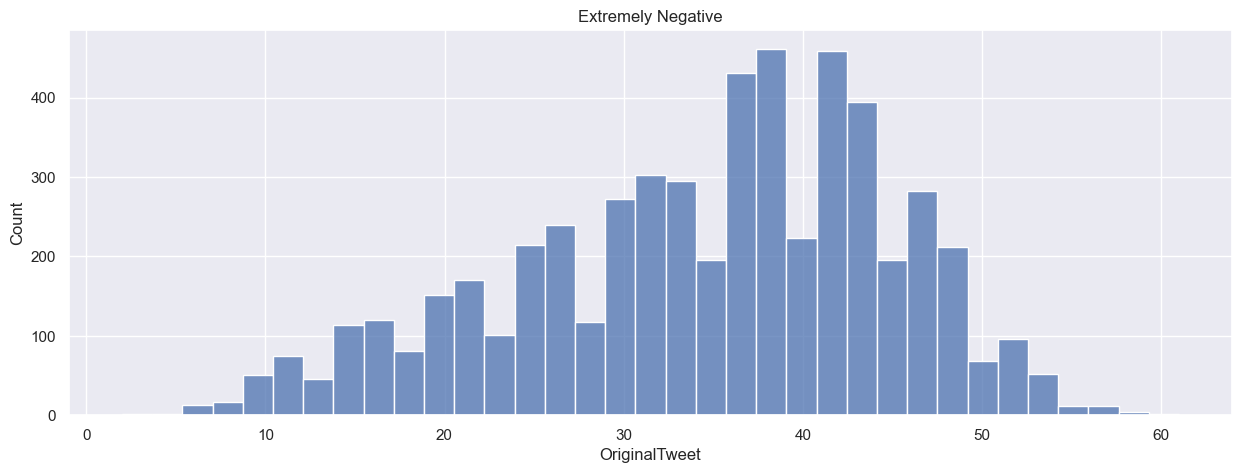

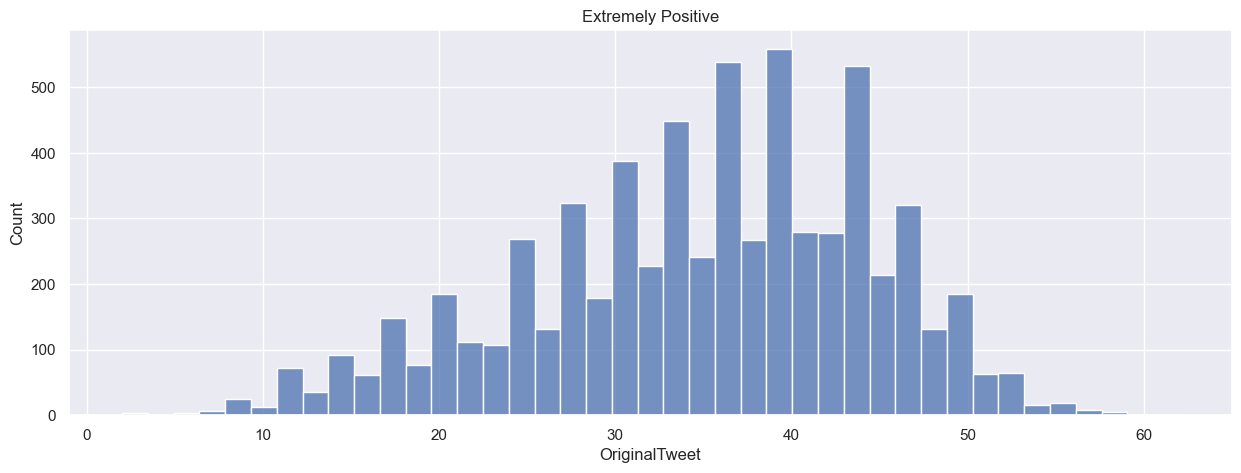

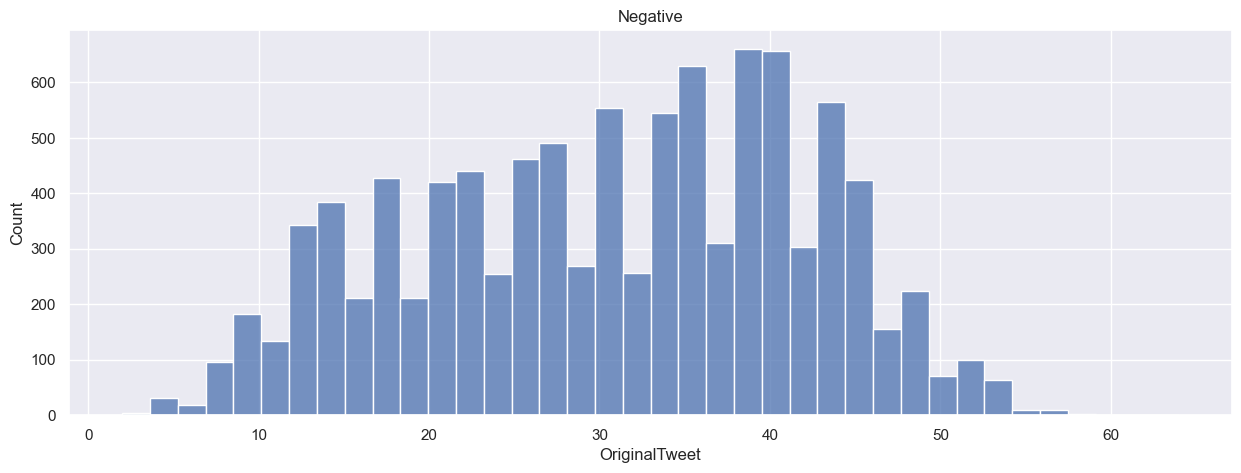

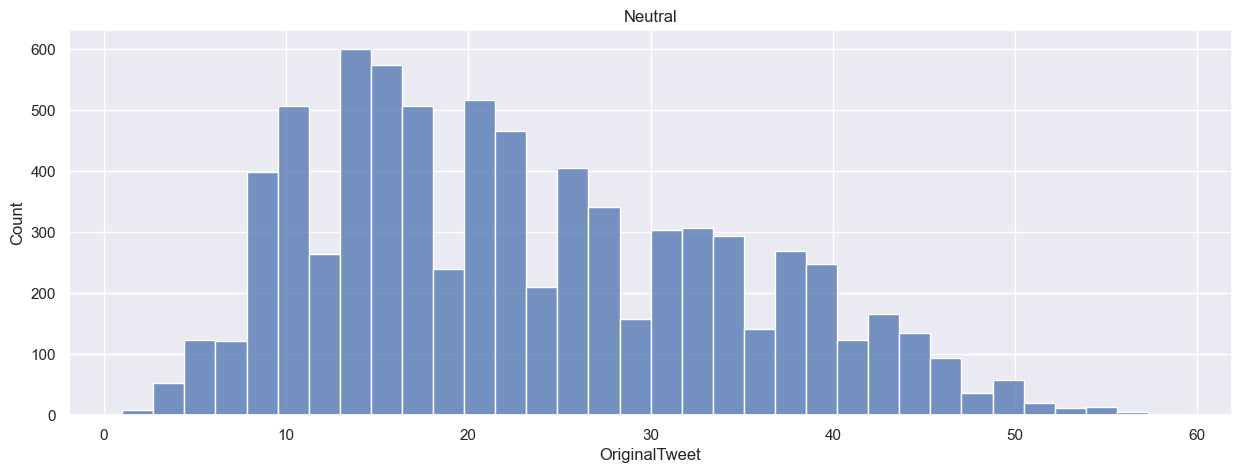

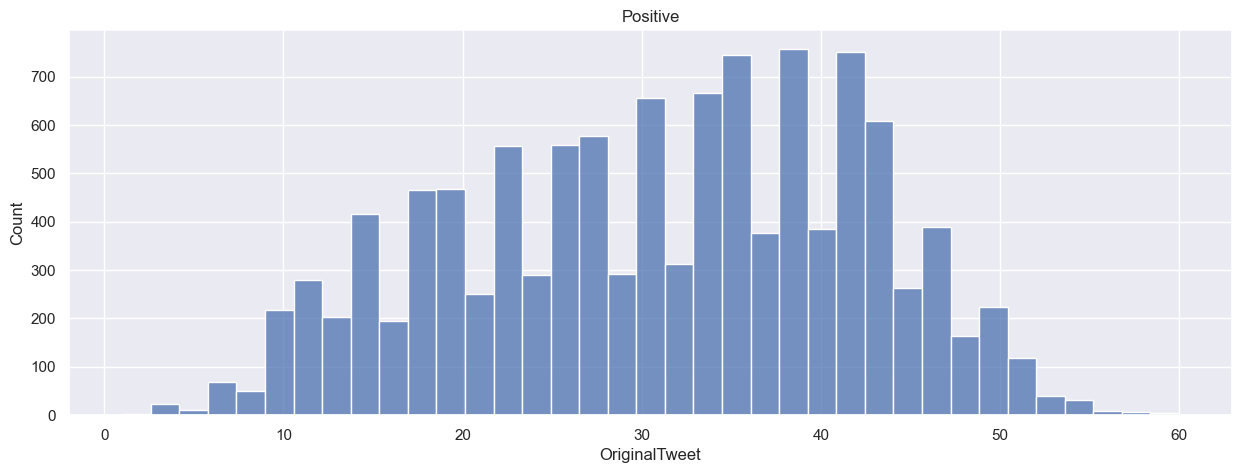

In [11]:
#Number of Words in tweets classified by sentiments
classes = train_data.groupby('Sentiment')['Sentiment'].unique()


for sent in classes : 
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    len_tweet = train_data[train_data['Sentiment'] == sent[0]]['OriginalTweet'].str.split().map(lambda x: len(x))
    sns.histplot(len_tweet).axes.set_title(sent[0])

In [12]:
#View the monthly distribution of tweets
time = train_data.groupby(['TweetAt']).size()
fig = px.line(train_data, 
              x=time.index, 
              y=time.values, 
              title = 'date of tweets',
              template='simple_white')

fig.update_layout(
font=dict(size=17,family="Arial"),)

fig.show()

**Exploratory Data Analysis**

1. There are missing values in the location column that will need to be cleaned or backfilled.
2. There are no duplicate rows in either test or train set.
3. The distribution of sentiments in the train set and test sets are relatively similar and are comparable with Positive and Negative being the most common sentiments.
4. Neutral Tweets generally have less words compared to the other sentiments.
5. In the dataset, majority of tweets were published from March. This is likely due to Covid-19 being announced as a pandemic by WHO on March 11.

**Data Preprocessing**

1) Converting to Lowercasing 

2) Removing Stopwords

3) Removing Punctuations

4) Removing Special Characters

5) Removing Extra Whitespaces 

6) Removing Line breakers

7) Removing Emojis

8) Removing Hashtags

9) Removing Mentions

10) Removal of Links

11) Removal of UTF-encoding

12) Tokenization 

13) Lemmatization

In [13]:
""" Preprocess v2 """
def preprocess_text(text: str, remove_stopwords: bool = True) -> str:
    """Function that cleans the input text by going to:
    - remove links
    - remove special characters
    - remove numbers
    - remove stopwords
    - convert to lowercase
    - remove excessive white spaces
    Arguments:
        text (str): text to clean
        remove_stopwords (bool): whether to remove stopwords
    Returns:
        str: cleaned text
    """
    special_characters = '[@_!#$%^&*()<>?/\|}{~:]'
    STOPWORDS = set(stopwords.words('english'))
    lemmatizer = nltk.WordNetLemmatizer()
    # remove emojis 
    text = remove_emojis(text)
    # remove links
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    # remove numbers and special characters
    # text = re.sub('[^a-zA-Z0-9 \n\.]'," ", text)
    text = re.sub(r'[\\/×\^\]:,.\[÷]', '', text)
    # remove all spaces and line breaks
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    # remove utf-encodings
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    # clean hashtags
    text = clean_hashtags(text)
    # filter_chars
    text = filter_chars(text)
    # remove mult spaces
    text = remove_mult_spaces(text)
    # remove stopwords
    if remove_stopwords:
        # 1. Create tokens.
        tokens = nltk.word_tokenize(text)
        # 2. Keep only words that are not purely special characters or numbers
        tokens = [w for w in tokens if (not all(c in special_characters for c in w)) & (not w.isdigit()) ]
        # 3. Lemmatize tokens.
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
        # 4. check if it's a stopword
        tokens = [w.lower().strip() for w in tokens if not w.lower() in STOPWORDS]
        # return a list of cleaned tokens
        
        return tokens

def remove_emojis(text):
    return demoji.replace(text, '')
    
### -- Source codes from kaggle --- ### 
#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)


# Source: https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 10), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=5).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [14]:
train_data['NewOriginalTweet'] = train_data["OriginalTweet"].apply(lambda row : " ".join(preprocess_text(row)))
test_data['NewOriginalTweet']= test_data["OriginalTweet"].apply(lambda row : " ".join(preprocess_text(row)))

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak 'm paran...


In [15]:
#Grouping the sentiments into {Negative, Neutral, Positive}
def groupSent(sent) : 
    if sent == "Extremely Positive": 
        return 'Positive'
    elif sent == "Extremely Negative":
        return 'Negative'
    else :
        return sent
    
train_data["Sentiment"] = train_data["Sentiment"].apply(lambda x: groupSent(x))
test_data["Sentiment"] = test_data["Sentiment"].apply(lambda x: groupSent(x))
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak 'm paran...


In [16]:
#Encoding of Sentiments into Numerical Values
Encoding = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_data["target"] = train_data["Sentiment"].map(Encoding)
test_data["target"] = test_data["Sentiment"].map(Encoding)

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet,target
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,1
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,2
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,2
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...,2
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak 'm paran...,0


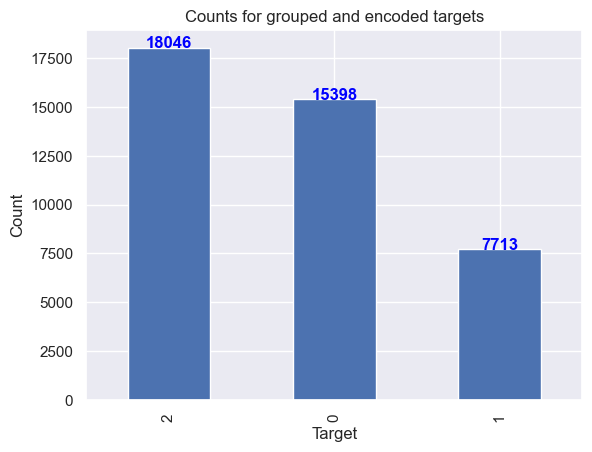

In [17]:
#Plot the target distribution after encoding
counts = train_data['target'].value_counts()
ax = counts.plot(kind='bar')

plt.title("Counts for grouped and encoded targets")
plt.xlabel("Target")
plt.ylabel("Count")

for i, v in counts.reset_index().iterrows():
    ax.text(i, v.target, str(v.target), color='blue', fontweight='bold', ha='center')

plt.show()

In [18]:
#Word count: counts the number of tokens in the text (separated by a space)
train_data['word_count'] = train_data['NewOriginalTweet'].apply(lambda x: len(str(x).split(" ")))
test_data['word_count'] = test_data['NewOriginalTweet'].apply(lambda x: len(str(x).split(" ")))

#Character count: sum the number of characters of each token
train_data['char_count'] = train_data['NewOriginalTweet'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
test_data['char_count'] = test_data['NewOriginalTweet'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

#Sentence count: count the number of sentences (separated by a period)
train_data['sentence_count'] = train_data['NewOriginalTweet'].apply(lambda x: len(str(x).split(".")))
test_data['sentence_count'] = test_data['NewOriginalTweet'].apply(lambda x: len(str(x).split(".")))

#Average word length: sum of words length divided by the number of words (character count/word count)
train_data['avg_word_length'] = train_data['char_count'] / train_data['word_count']
test_data['avg_word_length'] = test_data['char_count'] / test_data['word_count']

#Average sentence length: sum of sentences length divided by the number of sentences (word count/sentence count)
train_data['avg_sentence_length'] = train_data['word_count'] / train_data['sentence_count']
test_data['avg_sentence_length'] = test_data['word_count'] / test_data['sentence_count']

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,1,1,0,1,0.000000,1.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,2,27,159,1,5.888889,27.0
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,2,12,89,1,7.416667,12.0
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...,2,16,73,1,4.562500,16.0
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak 'm paran...,0,19,116,1,6.105263,19.0


In [19]:
#Count the number of unique words
def count_unique_words(text):
    return len(set(text.split()))
train_data['unique_word_count'] = train_data['NewOriginalTweet'].apply(lambda x:count_unique_words(x))
test_data['unique_word_count'] = test_data['NewOriginalTweet'].apply(lambda x:count_unique_words(x))

# Ratio of unique words to a total number of words.
train_data['unique_vs_words'] = train_data['unique_word_count']/train_data['word_count']
test_data['unique_vs_words'] = test_data['unique_word_count']/test_data['word_count']

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_vs_words
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,1,1,0,1,0.000000,1.0,0,0.000000
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,2,27,159,1,5.888889,27.0,24,0.888889
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,2,12,89,1,7.416667,12.0,12,1.000000
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...,2,16,73,1,4.562500,16.0,14,0.875000
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak 'm paran...,0,19,116,1,6.105263,19.0,19,1.000000


In [20]:
#Removal of rows with empty tweets.
new_train_data = train_data[train_data["char_count"] > 0]
new_test_data = test_data[test_data["char_count"] > 0]

new_train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NewOriginalTweet,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_vs_words
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,2,27,159,1,5.888889,27.0,24,0.888889
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...,2,12,89,1,7.416667,12.0,12,1.000000
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,food stock one empty please n't panic enough f...,2,16,73,1,4.562500,16.0,14,0.875000
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,ready go supermarket covid19 outbreak 'm paran...,0,19,116,1,6.105263,19.0,19,1.000000
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,news region first confirmed covid-19 case came...,2,25,144,1,5.760000,25.0,25,1.000000


## Dropping Original Tweets

In [21]:
new_train_data.drop(['OriginalTweet'], axis=1, inplace=True)

new_train_data.head()

C:\Users\Shan Shan\AppData\Local\Temp\ipykernel_23232\2565779674.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,UserName,ScreenName,Location,TweetAt,Sentiment,NewOriginalTweet,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_vs_words
1,3800,48752,UK,2020-03-16,Positive,advice talk neighbour family exchange phone nu...,2,27,159,1,5.888889,27.0,24,0.888889
2,3801,48753,Vagabonds,2020-03-16,Positive,coronavirus australia woolworth give elderly d...,2,12,89,1,7.416667,12.0,12,1.000000
3,3802,48754,London,2020-03-16,Positive,food stock one empty please n't panic enough f...,2,16,73,1,4.562500,16.0,14,0.875000
4,3803,48755,London,2020-03-16,Negative,ready go supermarket covid19 outbreak 'm paran...,0,19,116,1,6.105263,19.0,19,1.000000
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,Positive,news region first confirmed covid-19 case came...,2,25,144,1,5.760000,25.0,25,1.000000


In [22]:
new_test_data.drop(['OriginalTweet'], axis=1, inplace=True)

new_test_data.head()

C:\Users\Shan Shan\AppData\Local\Temp\ipykernel_23232\968022760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,UserName,ScreenName,Location,TweetAt,Sentiment,NewOriginalTweet,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_vs_words
0,1,44953,NYC,2020-02-03,Negative,trending new yorkers encounter empty supermark...,0,18,141,1,7.833333,18.0,18,1.000000
1,2,44954,"Seattle, WA",2020-02-03,Positive,could n't find hand sanitizer fred meyer turne...,2,16,91,1,5.687500,16.0,16,1.000000
2,3,44955,United States,2020-02-03,Positive,find protect loved one coronavirus,2,5,30,1,6.000000,5.0,5,1.000000
3,4,44956,Chicagoland,2020-02-03,Negative,panic buying hit newyork city anxious shopper ...,0,21,133,1,6.333333,21.0,21,1.000000
4,5,44957,"Melbourne, Victoria",2020-03-03,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,1,23,180,1,7.826087,23.0,21,0.913043


In [24]:
new_train_data.to_csv("Processed_Train.csv",encoding='iso-8859-1',index=False,na_rep='NULL')

In [25]:
new_test_data.to_csv("Processed_Test.csv",encoding='iso-8859-1',index=False,na_rep='NULL')